# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

In [1]:
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns


load_dotenv()

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv(os.getenv('csd', ''))

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [6]:
data['days_employed'] = data['days_employed'].abs()

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [14]:
data['education'] = data['education'].str.lower()

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [22]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


### Шаг 3. Исследуйте данные и ответьте на вопросы

In [23]:
def hack_pricticum(x: str, y: str,
                   name_title: str, 
                   name_x: str, 
                   df: pd.DataFrame= data,
                   name_y: str= 'Коэффициент задолженности') -> pd.pivot_table:
    """Вывод сводной таблицы и столбчатой диаграммы"""
    data_pivot = df.pivot_table(index=[x],
                                values=y,
                                aggfunc={'sum', 'count'})
    data_pivot['koeff'] = data_pivot['sum']/data_pivot['count']
    data_pivot = data_pivot.sort_values(by='koeff', ascending=False) 
    data_pivot = data_pivot.rename(columns={'count': 'total', 'sum': 'debtors'})
    display(data_pivot) 
    plt.figure(figsize = (15,5))
    sns.barplot(x=data_pivot.index, y=data_pivot['koeff']).set(
        xlabel=name_x, 
        ylabel=name_y,
        title=name_title)
    plt.show()

In [24]:
HW_DICT = {'3.1 children': ('children', 'debt', 'Коэффициент задолженности в зависимости от количества детей', 'количество детей'),
          '3.2 family_status': ('family_status', 'debt', 'Коэффициент задолженности в зависимости от семейного статуса', 'семейный статус'),
          '3.3 total_income_category': ('total_income_category', 'debt', 'Коэффициент задолженности в зависимости от категории дохода', 'категория дохода'),
          '3.4 purpose_category': ('purpose_category', 'debt', 'Коэффициент задолженности в зависимости от цели', 'Цель'),
          'gender':('gender', 'debt', 'Коэффициент задолженности в зависимости от пола', 'пол'),
          'education': ('education', 'debt', 'Коэффициент задолженности в зависимости от образования', 'образование'),
          'income_type': ('income_type', 'debt', 'Коэффициент задолженности в зависимости от типа дохода', 'тип дохода')}

3.1 children


,total,debtors,koeff
children,,,
4,41,4,0.097561
2,2052,194,0.094542
1,4808,444,0.092346
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


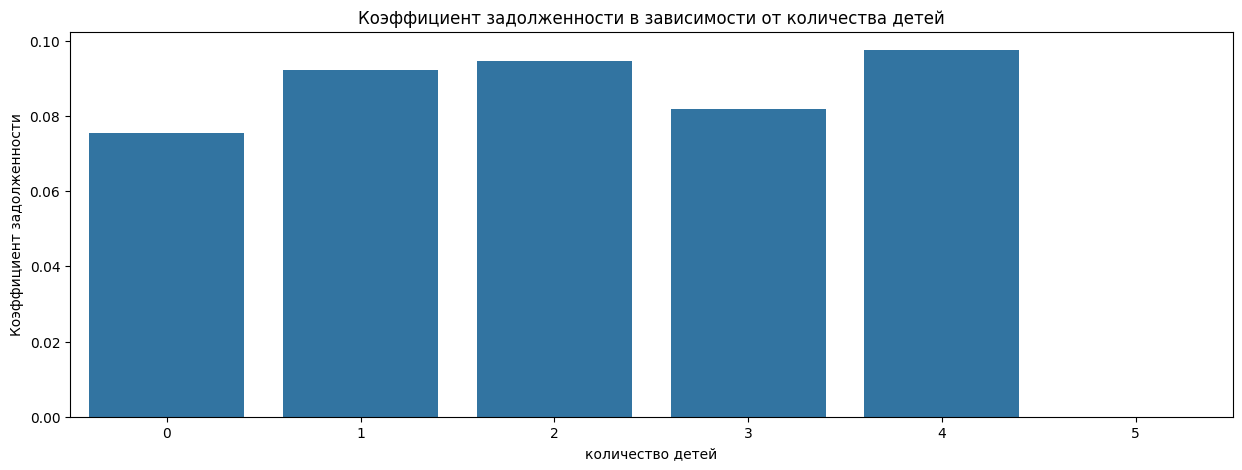

************************************************************************************************************************
3.2 family_status


,total,debtors,koeff
family_status,,,
Не женат / не замужем,2796,273,0.097639
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246


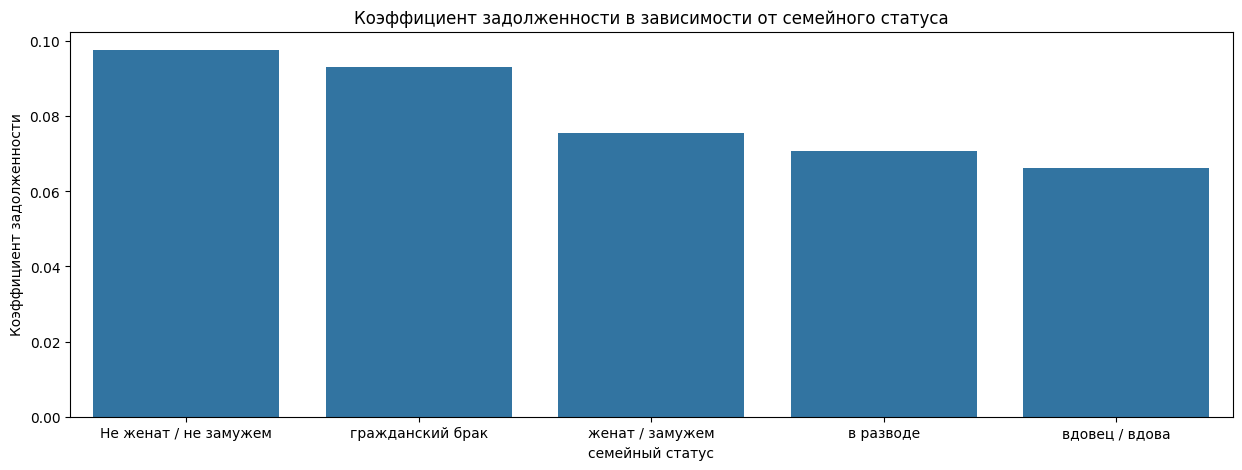

************************************************************************************************************************
3.3 total_income_category


,total,debtors,koeff
total_income_category,,,
E,22,2,0.090909
C,15921,1353,0.084982
A,25,2,0.080000
B,5014,354,0.070602
D,349,21,0.060172


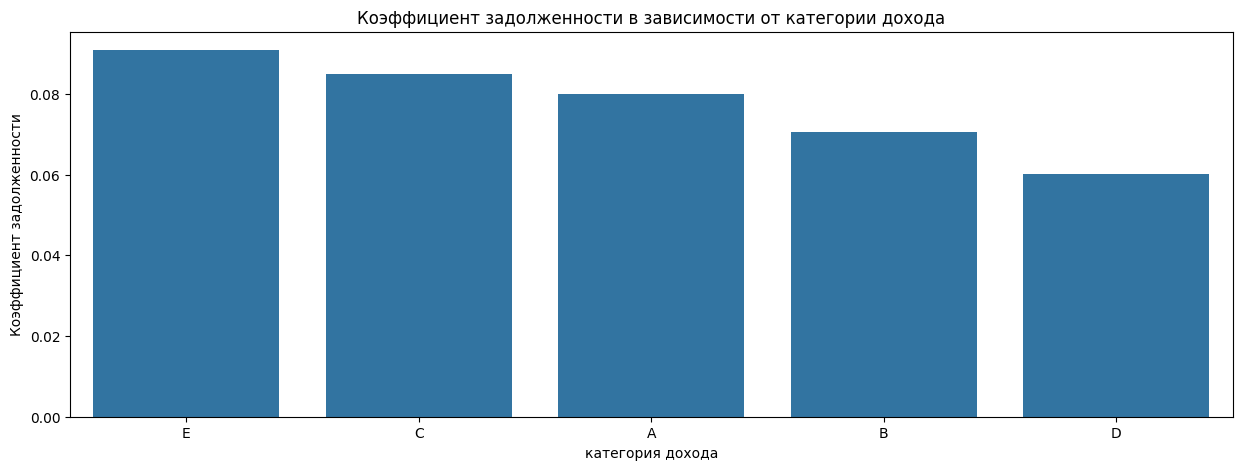

************************************************************************************************************************
3.4 purpose_category


,total,debtors,koeff
purpose_category,,,
операции с автомобилем,4279,400,0.093480
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118
операции с недвижимостью,10751,780,0.072551


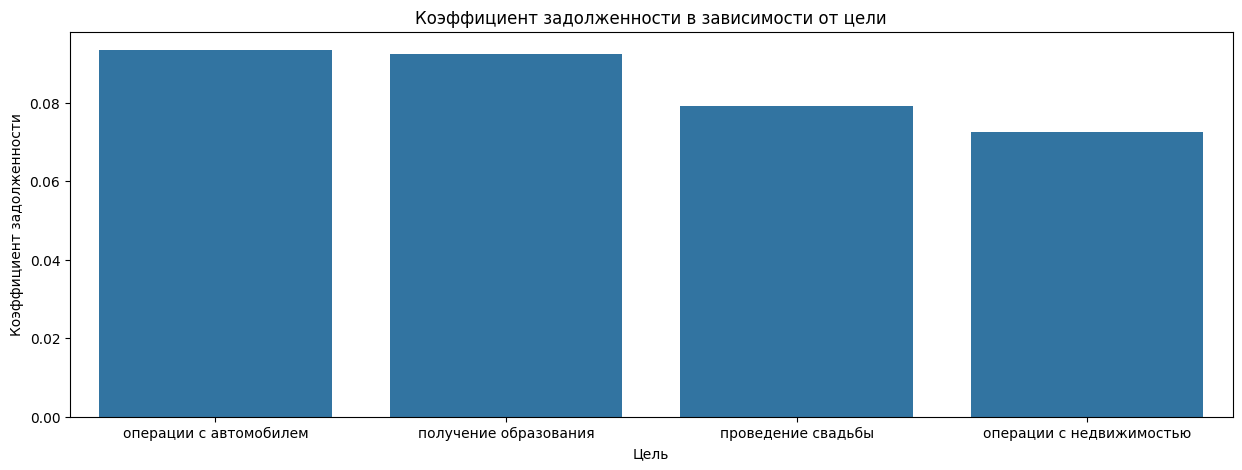

************************************************************************************************************************
gender


,total,debtors,koeff
gender,,,
M,7238,743,0.102653
F,14092,989,0.070182
XNA,1,0,0.000000


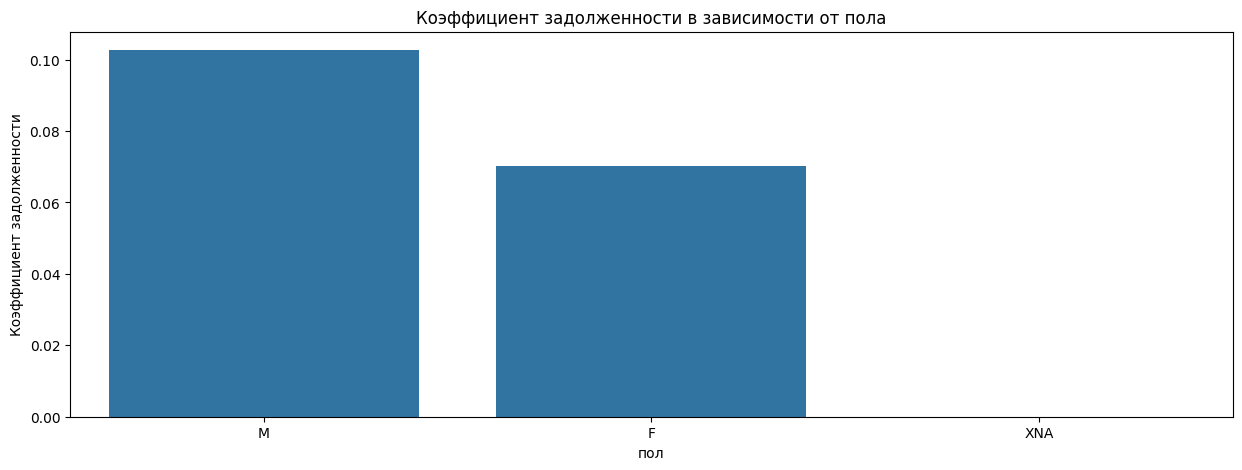

************************************************************************************************************************
education


,total,debtors,koeff
education,,,
начальное,282,31,0.109929
неоконченное высшее,741,68,0.091768
среднее,15075,1355,0.089884
высшее,5227,278,0.053185
ученая степень,6,0,0.000000


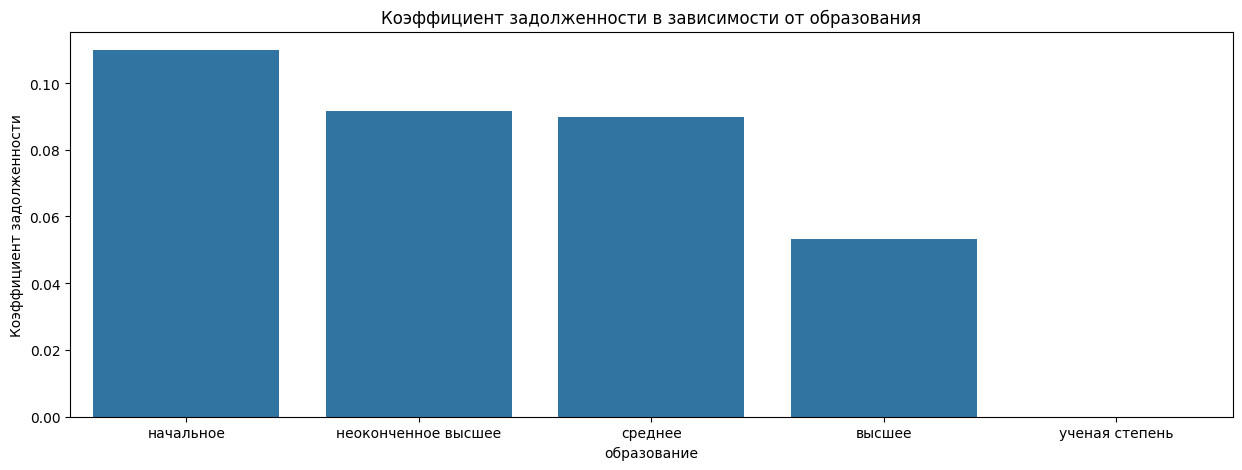

************************************************************************************************************************
income_type


,total,debtors,koeff
income_type,,,
в декрете,1,1,1.000000
безработный,2,1,0.500000
сотрудник,11015,1054,0.095688
компаньон,5047,374,0.074103
госслужащий,1451,86,0.059269
пенсионер,3812,216,0.056663
предприниматель,2,0,0.000000
студент,1,0,0.000000


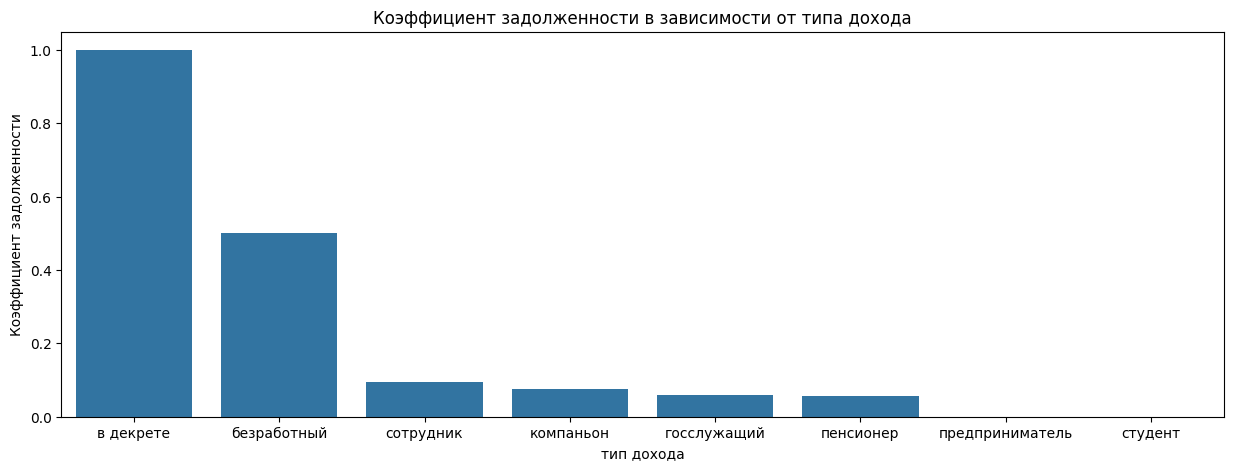

************************************************************************************************************************


In [25]:
for key in HW_DICT:
    print(key)
    hack_pricticum(*HW_DICT[key])
    print('*'*120)

**Вывод:**

1. Можно отметить, что люди без детей наиболее ответственные заемщики. Данных по многодетным недостаточно для корректных выводов по ним.
2. По приведенным выше графикам видно, что наиболее ответственными должниками являются вдовцы и вдовы, однако по этой категории для обоснованных выводов слишком мало данных, поэтому отметим, что всего лишь в 7% всех случаев женатые/замужем имели задолженность.
3. Делать выводы представляется разумным по двум наибольшим категориям (В и С). Сравнивая из, можем увидеть, что отдавать предпочтение стоит первой.
4. Ипотечный рынок остается самым надежным, несмотря на события 2008 года. В то время как рынок автомобильного кредитования выглядит наиболее рискованным.

**Общий вывод:** 
В рамках анализа были выявлены следующие зависимости: люди без детей более отвественные, чем с, причем важным замечанием является то, что по многодетным семьям недостаточно данных, женатые/замужные предпочтительнее, чем люди в поиске, стоит также отметить, что люди с категорией доходов В более надежны в плане кредитования, самая надежная цель кредитования - ипотека
На основе написанного выше, можно описать портрет идеального клиента: женщина, замужем, с высшим образование, сотрудник (компаньен или госслужащая), без детей, хочет взять ипотеку.
Работа над данными: предобработка (работа с пропусками, поиск и удаление дубликатов), построение сводных таблиц и столбчатых диаграмм по ним.